In [720]:
import pandas as pd
import numpy as np
from numpy.random import seed

In [721]:
seed(100)

In [722]:
import warnings
warnings.filterwarnings("ignore")

In [723]:
df = pd.read_excel("./DATA/default of credit card clients.xls", skiprows=1)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [724]:
cols = df.columns.tolist()
cols

['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [725]:
idx1 = df[ df['default payment next month']==0 ].ID.values
idx2 = df[ df['default payment next month']==1 ].ID.values
idx1.shape, idx2.shape

((23364,), (6636,))

In [726]:
n1 = np.random.choice(idx1, 15000)
n2 = np.random.choice(idx2, 5000)
np.shape(n1), np.shape(n2)

((15000,), (5000,))

In [727]:
n11 = np.unique(n1)
n22 = np.unique(n2)
np.shape(n11), np.shape(n22)

((11025,), (3553,))

In [728]:
type(n11), type(n22)

(numpy.ndarray, numpy.ndarray)

In [729]:
def ret_idx(m1, m2):
    idx = list(n11[0:m1]) + list(n22[0:m2]) 
    return idx
    

In [730]:
mm = 3000
nn = np.arange(1500,20,-50)
nn

array([1500, 1450, 1400, 1350, 1300, 1250, 1200, 1150, 1100, 1050, 1000,
        950,  900,  850,  800,  750,  700,  650,  600,  550,  500,  450,
        400,  350,  300,  250,  200,  150,  100,   50])

In [731]:
1500*100/3000, 50*100/3000

(50.0, 1.6666666666666667)

In [732]:
idx = ret_idx(950,50)
np.shape(idx)

(1000,)

In [733]:
np.shape(cols)

(25,)

In [734]:
del cols[0]

In [735]:
np.shape(cols)

(24,)

In [736]:
del cols[23]
np.shape(cols)

(23,)

In [737]:
cols

['LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

In [738]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

from sklearn import svm
from sklearn.svm import SVC

In [739]:
rr = []
ss = []

In [740]:
for ps in nn:
    ratio = ps/mm
    rr.append(ratio)
    xid = ret_idx(mm, ps)
    #print(np.shape(xid),'\t', ps/mm)
    df1 = df.iloc[xid,:]
    #print(df1.shape)
    y = df1['default payment next month'].values
    data = df1[cols].values
    X = preprocessing.StandardScaler().fit(data).transform(data)
    x_tr, x_t, y_tr, y_t = train_test_split(X, y, test_size=0.36, random_state=100)
    #print(x_tr.shape, x_t.shape, y_tr.shape, y_t.shape)
    clf = svm.SVC()
    clf.fit(x_tr, y_tr)
    y_p = clf.predict(x_t)
    score = accuracy_score(y_t, y_p)*100
    ss.append(score)
    #print(ratio, '\t', score)
    

In [741]:
res = pd.DataFrame(dict(list(zip(['percentile','score'],[rr, ss]))))
res

,percentile,score
0,0.500000,80.370370
1,0.483333,80.087391
2,0.466667,79.229798
3,0.450000,81.226054
4,0.433333,81.395349
5,0.416667,80.261438
6,0.400000,81.084656
7,0.383333,81.659973
8,0.366667,80.487805
9,0.350000,79.629630


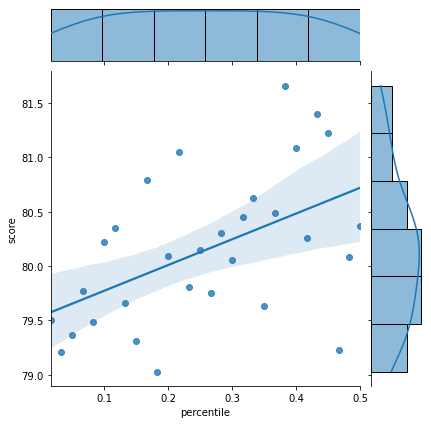

In [742]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.jointplot(x="percentile", y="score", data=res, kind="reg")
plt.show()

In [743]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [744]:
ols_fit = ols('score ~ percentile', res).fit()
ols_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     9.594
Date:                Sat, 30 Apr 2022   Prob (F-statistic):            0.00441
Time:                        20:04:32   Log-Likelihood:                -26.450
No. Observations:                  30   AIC:                             56.90
Df Residuals:                      28   BIC:                             59.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     79.5347      0.227    351.146      0.000      79.071      79.999
percentile     2.3711      0.766      3.097      0.004       0.803       3.939
==============================================================================
Omnibus:                        0.105   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.949   Jarque-Bera (JB):                0.023
Skew:                           0.008   Prob(JB):                        0.989
Kurtosis:                       2.866   Cond. No.                         7.40
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""